In [17]:
%matplotlib auto

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter
from scipy.optimize import curve_fit
import pandas as pd

SMALL_SIZE = 8
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=1.5)
plt.rc('xtick.major',size=5,width=2)
plt.rc('ytick.major',size=5,width=2)
plt.rc('xtick.minor',size=2,width=2)
plt.rc('ytick.minor',size=2,width=2)

def normalize(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))
def decay1(t,A,tau,y0):
    return A*np.exp(t/tau)+y0
def decay2(t,A1,A2,tau1,tau2,y0):
    return A1*np.exp(-t/tau1)+A2*np.exp(-t/tau2)+y0
def curve_fit_new(f, xdata, ydata,unit_time=50):
    popt, pcov = curve_fit(f, xdata/unit_time, ydata)#,maxfev=100000)
    perr = np.sqrt(np.diag(pcov))
    popt_new = np.concatenate([popt[:2],popt[2:4]*unit_time,popt[4:]])
    perr_new = np.concatenate([perr[:2],perr[2:4]*unit_time,perr[4:]])
    return popt_new,perr_new
def plotBigGraphs(which,normalized_list,minor_shift,num_points = 1400,unit_time = 50,cutoff_raw = 70):
    if which == 'G':
        minor_shift = [0,0,0,1,0,1,0,0,0,3]
        normalized_list = normalized_Glist
        bigFigurePath = savePath+'/G_big.png'
        smallFigurePath = savePath+'/G_small.png'
    elif which == 'B':
        minor_shift = [0,0,0,0,0,1,0,0,0,1]
        normalized_list = normalized_Blist
        bigFigurePath = savePath+'/B_big.png'
        smallFigurePath = savePath+'/B_small.png'
    
    fast_list = []
    slow_list = []
    plt.ioff()
    fig,axs = plt.subplots(3,4,figsize=(15,10))
    for ind,normalized in enumerate(normalized_list):
        cutoff = cutoff_raw-minor_shift[ind]
        xlist = np.arange(0,num_points*unit_time,unit_time) - cutoff*unit_time
        ax = axs[ind//4,ind%4]
        popt_new,perr_new = curve_fit_new(decay2,xlist[cutoff:len(normalized)],normalized[cutoff:])
        fast_list.append(np.min(popt_new[2:4]))
        slow_list.append(np.max(popt_new[2:4]))
        ax.plot(xlist[cutoff:len(normalized)]/1e3,decay2(xlist[cutoff:len(normalized)],*popt_new)-popt_new[-1]/10,color='red',linewidth=1.5)
        ax.plot(xlist[:len(normalized)]/1e3,normalized[:]-popt_new[-1]/10,'-',linewidth=1,color='black',zorder=-9)
        ax.set_yscale('log')
        ax.set_xlim(xlist[0]/1e3,65)
        ax.set_ylim(7e-2,1.2)
        ax.set_xlabel('Time (µs)')
        ax.set_ylabel('iMIM-Im (a.u.)')
        for axis in ['top','bottom','left','right']:
              ax.spines[axis].set_linewidth(1.5)
#         ax.xaxis.set_tick_params(width=2,length=5)
#         ax.yaxis.set_tick_params(width=2,length=5)
#         ax.xaxis.set_tick_params(width=2,length=5)
#         ax.yaxis.set_tick_params(which='minor',width=2)
    #     ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
        ax.set_xticks(np.arange(0,70,10))
    plt.tight_layout(pad=2)
    plt.savefig(bigFigurePath)
    
    return fast_list,slow_list


savePath = "../Perovskite_KaiZhu(2nd_floor)/Sample_201911/1/processFiles/"
B_root = "../Perovskite_KaiZhu(2nd_floor)/Sample_201911/1/20200129_446nm_20_points/Data/"
G_root = B_root
B_files = ["2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B1_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B2_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B3_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B4_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B5_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B6_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B7_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B8_transposed.csv",
          "2020-01-30_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B9_transposed.csv",
          "2020-01-30_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_B10_transposed.csv"]
G_files = ["2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G1_again_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G2_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G3_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G4_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G5_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G6_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G7_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G8_transposed.csv",
          "2020-01-29_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G9_transposed.csv",
          "2020-01-30_7kHz_result_0.0028_446nm_KaiZhu_Provskite1_Im_5usx14ns_average30times_G10_transposed.csv"]

data_Blist = [pd.read_csv(B_root+file,header=None)[0].values for file in B_files]
data_Glist = [pd.read_csv(G_root+file,header=None)[0].values for file in G_files]
normalized_Blist = [normalize(item) for item in data_Blist]
normalized_Glist = [normalize(item) for item in data_Glist]

#minor_shift = [0,0,0,0,0,1,0,0,0,1]
minor_shift = [0,0,0,1,0,1,0,0,0,3]

fast_Glist,slow_Glist = plotBigGraphs('G',normalized_Glist,minor_shift)
fast_Blist,slow_Blist = plotBigGraphs('B',normalized_Blist,minor_shift)





Using matplotlib backend: Qt5Agg


C:\Users\Zhaodong Chu\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


In [14]:
import numpy as np
import matplotlib.pyplot as plt
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=1.5)
plt.rc('xtick.major',size=3,width=2)
plt.rc('ytick.major',size=3,width=2)
plt.rc('xtick.minor',size=2,width=1)
plt.rc('ytick.minor',size=2,width=1)

# t1_G_list = np.asarray([866.66511,773.89004,556.51447,882.48158,644.69493,645.01299,438.60335,598.80665,819.65826,730.30574])/1000
# t1_B_list = np.asarray([842.22812,743.47775,997.40317,680.57775,604.59577,513.29562,647.65729,780.53478,645.0389,557.08436])/1000
# t2_G_list = np.asarray([17813.18258,14568.61247,17769.69621,19446.6767,17903.719,14174.62262,13554.3532,14978.64816,16057.04112,21151.842])/1000
# t2_B_list = np.asarray([15837.84388,13665.93613,19886.85435,16813.93666,17317.41025,15604.54352,14858.42028,19656.09712,18938.22791,13190.91359])/1000
t1_G_list = np.asarray(fast_Glist)/1000
t1_B_list = np.asarray(fast_Blist)/1000
t2_G_list = np.asarray(slow_Glist)/1000
t2_B_list = np.asarray(slow_Blist)/1000

t1_G_mean = np.mean(t1_G_list)
t1_B_mean = np.mean(t1_B_list)
t2_G_mean = np.mean(t2_G_list)
t2_B_mean = np.mean(t2_B_list)
print("t1 Grain:",t1_G_mean)
print("t1 Boundary:",t1_B_mean)
print("t2 Grain:",t2_G_mean)
print("t2 Boundary:",t2_B_mean)
# t1_G_std = np.std(t1_G_list)
# t1_B_std = np.std(t1_B_list)
# t2_G_std = np.std(t2_G_list)
# t2_B_std = np.std(t2_B_list)
t1_G_std = np.array([70.35679,74.42368,48.80223,84.13497,69.26422,81.72991,48.96266,63.18758,83.93289,70.52462])
t2_G_std = np.array([1369.13997,975.75943,1350.35693,1764.94823,1484.0215,918.88845,832.21779,953.43973,1345.50963,2220.45955])
t1_B_std = np.array([77.83112,68.50899,88.94773,61.86313,48.55473,49.44132,67.70574,63.05848,46.50974,52.24646])
t2_B_std = np.array([980.1255,860.95999,1537.57537,1340.98951,1057.86242,997.69036,998.15669,1393.47919,1194.50137,857.29649])
# t1_G_errorbar = [[t1_G_mean-t1_G_std/2,t1_G_mean+t1_G_std/2] for item in t1_G_list]
# t2_G_errorbar = [[t2_G_mean-t2_G_std/2,t2_G_mean+t2_G_std/2] for item in t2_G_list]
# t1_B_errorbar = [[t1_B_mean-t1_B_std/2,t1_B_mean+t1_B_std/2] for item in t1_B_list]
# t2_B_errorbar = [[t2_B_mean-t2_B_std/2,t2_B_mean+t2_B_std/2] for item in t2_B_list]
t1_G_errorbar = [[item-t1_G_std[ind],item+t1_G_std[ind]] for ind,item in enumerate(t1_G_list)]
t2_G_errorbar = [[item-t2_G_std[ind],item+t2_G_std[ind]] for ind,item in enumerate(t2_G_list)]
t1_B_errorbar = [[item-t1_B_std[ind],item+t1_B_std[ind]] for ind,item in enumerate(t1_B_list)]
t2_B_errorbar = [[item-t2_B_std[ind],item+t2_B_std[ind]] for ind,item in enumerate(t2_B_list)]

marker_size = 45

pos_list_G = np.array([1,2,3,4,5,6,7,8,9,10])-0.125
pos_list_B = np.array([1,2,3,4,5,6,7,8,9,10])+0.125
plt.figure()
plt.scatter(pos_list_G,t1_G_list,color='black',s=marker_size,label="τ₁, grain(G),        $\overline{τ}$₁$^G$="+"{:.3f}µs".format(t1_G_mean),zorder=100)
plt.plot([0,11],[t1_G_mean,t1_G_mean],color = 'black',linestyle='dashed',dashes = (5,1),linewidth=2)
# for ind,item in enumerate(t1_G_errorbar):
#      plt.errorbar(pos_list_G[ind],t1_G_errorbar[ind],color = 'black',fmt='-_',capsize=1,zorder=0,linewidth=0.5)
plt.scatter(pos_list_B,t1_B_list,color='red',s=marker_size,label="τ₁, boundary(B), $\overline{τ}$₁$^B$="+"{:.3f}µs".format(t1_B_mean),zorder=100)        
plt.plot([0,11],[t1_B_mean,t1_B_mean],color = 'red',linestyle='dashed',linewidth=2)
# for ind,item in enumerate(t1_B_errorbar):
#      plt.errorbar(pos_list_B[ind],t1_B_errorbar[ind],color = 'red',fmt='-_',capsize=1,zorder=0,linewidth=0.5)
plt.yscale('log')
# plt.plot([1,10])
# plt.ylim(10,5e4)

# plt.figure()
plt.scatter(pos_list_G,t2_G_list,color='black',marker = 's',s=marker_size,label="τ₂, grain(G),        $\overline{τ}$₂$^G$="+"{:.3f}µs".format(t2_G_mean),zorder=100)
plt.plot([0,11],[t2_G_mean,t2_G_mean],color = 'black',linestyle='dashed',dashes = (5,1),linewidth=2)
# for ind,item in enumerate(t2_G_errorbar):
#      plt.errorbar(pos_list_G[ind],t2_G_errorbar[ind],color = 'black',fmt='-_',capsize=1,zorder=0,linewidth=0.5)
plt.scatter(pos_list_B,t2_B_list,color='red',marker='s',s=marker_size,label="τ₂, boundary(B), $\overline{τ}$₂$^B$="+"{:.3f}µs".format(t2_B_mean),zorder=100)
plt.plot([0,11],[t2_B_mean,t2_B_mean],color = 'red',linestyle='dashed',linewidth=2)
# for ind,item in enumerate(t2_B_errorbar):
#      plt.errorbar(pos_list_B[ind],t2_B_errorbar[ind],color = 'red',fmt='-_',capsize=1,zorder=0,linewidth=0.5)

# plt.yscale('log')
plt.ylim(1e-3,5e1)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], )# loc='upper left')

# plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlim(0.1,10.9) 
plt.xlabel("Position Label")
plt.ylabel("Lifetime (µs)")
plt.tight_layout()

plt.savefig(savePath+'/20points_446nm.png')

t1 Grain: 0.615091156362792
t1 Boundary: 0.6116335936054642
t2 Grain: 16.416328708422885
t2 Boundary: 16.206964514903238


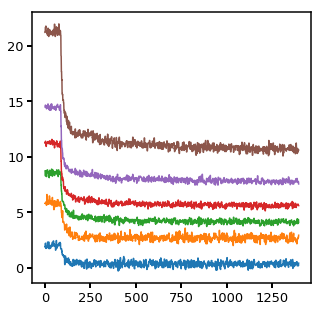

In [70]:
%matplotlib inline
HTL_root = "../Perovskite/HTL_ETL2/HTL_gloveBox/Data/"

HTL_intensity_files = ["2020-06-25_7kHz_result_0.0010_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv",
                       "2020-06-25_7kHz_result_0.0018_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-25_7kHz_result_0.0098_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "tmp2020-06-27_7kHz_result_0.0155_446nm_KaiZhu_Provskite_HTLGloveBoxRound2_Im_5usx14ns_average30times_randPos_transposed.csv",
                       "tmp2020-06-27_7kHz_result_0.0216_446nm_KaiZhu_Provskite_HTLGloveBoxRound2_Im_5usx14ns_average30times_randPos_transposed.csv",
                       "2020-06-25_7kHz_result_0.0155_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv"]
HTL_list = [-pd.read_csv(HTL_root+file,header=None)[0].values for file in HTL_intensity_files]
plt.figure(figsize=(5,5))
for ind,htl in enumerate(HTL_list):
    plt.plot(htl+1.75*ind)


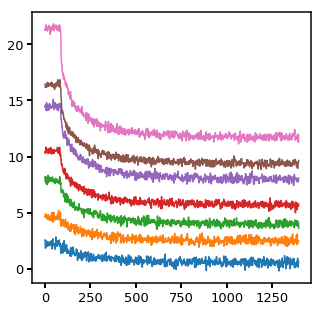

In [73]:
%matplotlib inline
ETL_root = "../Perovskite/HTL_ETL2/ETL_TiO2_firstBatch/Data/"

ETL_intensity_files = [#"2020-06-26_7kHz_result_0.0004_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-26_7kHz_result_0.0010_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-26_7kHz_result_0.0018_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      #"2020-06-26_7kHz_result_0.0030_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-26_7kHz_result_0.0050_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-26_7kHz_result_0.0084_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-26_7kHz_result_0.0098_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-26_7kHz_result_0.0155_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-26_7kHz_result_0.0216_446nm_KaiZhu_Provskite_TiO2ETL_Im_5usx14ns_average30times_randPos_transposed.csv",
                      #"tmp2020-06-27_7kHz_result_0.0261_446nm_KaiZhu_Provskite_ETLTiO2FirstBatchVacuumChamber_Im_5usx14ns_average30times_randPos_transposed.csv",
                      #"tmp2020-06-27_7kHz_result_0.0270_446nm_KaiZhu_Provskite_ETLTiO2FirstBatchVacuumChamber_Im_5usx14ns_average30times_randPos_transposed.csv"
                      ]
ETL_list = [-pd.read_csv(ETL_root+file,header=None)[0].values for file in ETL_intensity_files]
plt.figure(figsize=(5,5))
for ind,etl in enumerate(ETL_list):
    plt.plot(etl+1.75*ind)


In [ ]:
%matplotlib inline
HTL_root1 = "../Perovskite/HTL_ETL2/HTL_gloveBox/Data/"
HTL_root2 = "../Perovskite/HTL_ETL2/HTL_gloveBox/Data/"

HTL_intensity_files = ["2020-06-25_7kHz_result_0.0010_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv",
                       "2020-06-25_7kHz_result_0.0018_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "2020-06-25_7kHz_result_0.0098_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv",
                      "tmp2020-06-27_7kHz_result_0.0155_446nm_KaiZhu_Provskite_HTLGloveBoxRound2_Im_5usx14ns_average30times_randPos_transposed.csv",
                       "tmp2020-06-27_7kHz_result_0.0216_446nm_KaiZhu_Provskite_HTLGloveBoxRound2_Im_5usx14ns_average30times_randPos_transposed.csv",
                       "2020-06-25_7kHz_result_0.0155_446nm_KaiZhu_Provskite_HTLGloveBox_Im_5usx14ns_average30times_randPos_transposed.csv"]
HTL_list = [-pd.read_csv(HTL_root+file,header=None)[0].values for file in HTL_intensity_files]
plt.figure(figsize=(5,5))
for ind,htl in enumerate(HTL_list):
    plt.plot(htl+1.75*ind)


(0.01, 1.2229865615553888)

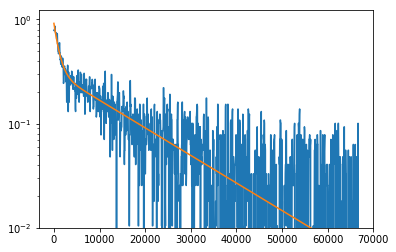

In [98]:
target =normalize(df[0].values[60:])
xlist = np.arange(0,50*len(target),50)
popt_new,perr_new = curve_fit_new(decay2,xlist,target)
plt.plot(xlist,target)

plt.plot(xlist,target-popt_new[-1])
plt.plot(xlist,decay2(xlist,*popt_new)-popt_new[-1])
plt.yscale('log')
plt.ylim(1e-2)

In [15]:
perr_new

NameError: name 'perr_new' is not defined

In [12]:
perr_new

array([3.03928779e-02, 8.72678045e-03, 5.04792554e+01, 8.12014143e+02,
       2.83232772e-03])

In [21]:
np.mean(fast_list)

615.091156362792

In [27]:
np.random.shuffle(t1_G_std)

In [28]:
t1_G_std

array([63.18758, 70.52462, 48.80223, 84.13497, 70.35679, 81.72991,
       74.42368, 69.26422, 48.96266, 83.93289])